In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [2]:
# Load the inference pickle file
with open('/storage/vbutoi/scratch/ESE/records/inference_stats.pkl', 'rb') as f:
    all_logs = pickle.load(f)

In [3]:
all_logs

,subj_idx,slice,label_amount,metric,metric_weighting,metric_score,metric_bins,bin_counts,Acc,Dice,task,split
0,0,0,0.0,ECE,uniform,0.000000e+00,"(0.0, 0.0, 0.0, 0.0, 0.0)","(0.0, 0.0, 0.0, 0.0, 0.0)",1.0,1.0,Singapore,train
1,0,0,0.0,ECE,proportional,0.000000e+00,"(0.0, 0.0, 0.0, 0.0, 0.0)","(0.0, 0.0, 0.0, 0.0, 0.0)",1.0,1.0,Singapore,train
2,0,0,0.0,ESE,uniform,4.350782e-08,"(4.3507816e-07, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(65536.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...",1.0,1.0,Singapore,train
3,0,0,0.0,ESE,proportional,4.350782e-07,"(4.3507816e-07, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(65536.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...",1.0,1.0,Singapore,train
4,0,1,0.0,ECE,uniform,0.000000e+00,"(0.0, 0.0, 0.0, 0.0, 0.0)","(0.0, 0.0, 0.0, 0.0, 0.0)",1.0,1.0,Singapore,train
...,...,...,...,...,...,...,...,...,...,...,...,...
156667,6,254,0.0,ESE,proportional,4.350782e-07,"(4.3507816e-07, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(65536.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...",1.0,1.0,Amsterdam,cal
156668,6,255,0.0,ECE,uniform,0.000000e+00,"(0.0, 0.0, 0.0, 0.0, 0.0)","(0.0, 0.0, 0.0, 0.0, 0.0)",1.0,1.0,Amsterdam,cal
156669,6,255,0.0,ECE,proportional,0.000000e+00,"(0.0, 0.0, 0.0, 0.0, 0.0)","(0.0, 0.0, 0.0, 0.0, 0.0)",1.0,1.0,Amsterdam,cal
156670,6,255,0.0,ESE,uniform,4.350782e-08,"(4.3507816e-07, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(65536.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...",1.0,1.0,Amsterdam,cal


In [4]:
all_logs.iloc[0]

subj_idx                                    0
slice                                       0
label_amount                              0.0
metric                                    ECE
metric_weighting                      uniform
metric_score                              0.0
metric_bins         (0.0, 0.0, 0.0, 0.0, 0.0)
bin_counts          (0.0, 0.0, 0.0, 0.0, 0.0)
Acc                                       1.0
Dice                                      1.0
task                                Singapore
split                                   train
Name: 0, dtype: object

In [5]:
example = all_logs.iloc[0]
for field in example.keys():
    print(field, type(example[field]), ":", example[field])

subj_idx <class 'numpy.int64'> : 0
slice <class 'numpy.int64'> : 0
label_amount <class 'numpy.float64'> : 0.0
metric <class 'str'> : ECE
metric_weighting <class 'str'> : uniform
metric_score <class 'numpy.float64'> : 0.0
metric_bins <class 'tuple'> : (0.0, 0.0, 0.0, 0.0, 0.0)
bin_counts <class 'tuple'> : (0.0, 0.0, 0.0, 0.0, 0.0)
Acc <class 'numpy.float64'> : 1.0
Dice <class 'numpy.float64'> : 1.0
task <class 'str'> : Singapore
split <class 'str'> : train


# First let's look at how (for this model) dice and accuracy are related.

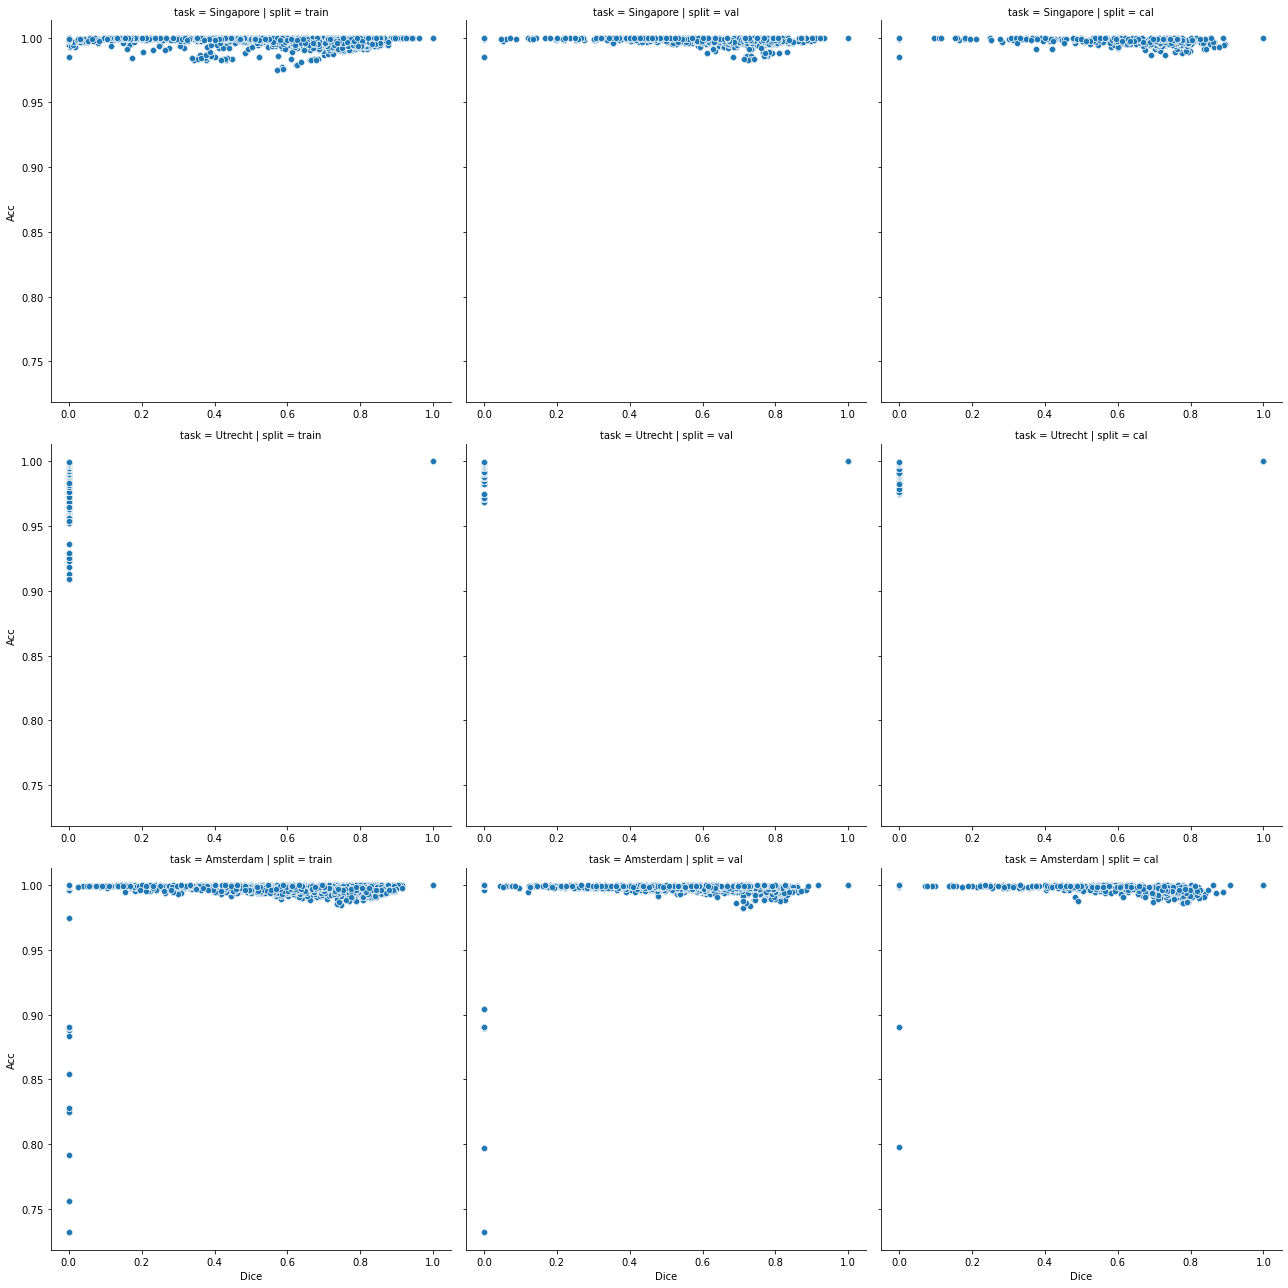

In [6]:
plt.rcParams.update({'font.size': 15})  

g = sns.relplot(
    data=all_logs,
    x='Dice',
    y='Acc',
    row='task',
    col='split',
    kind='scatter',
    height=6,
    facet_kws={"sharex": False}
    )

In [7]:
# Isolate the cases which have no-label and cases where there is at least some label.
def has_label(value):
    return (value != 0.0)

all_logs['has_label'] = all_logs['label_amount'].apply(has_label) 

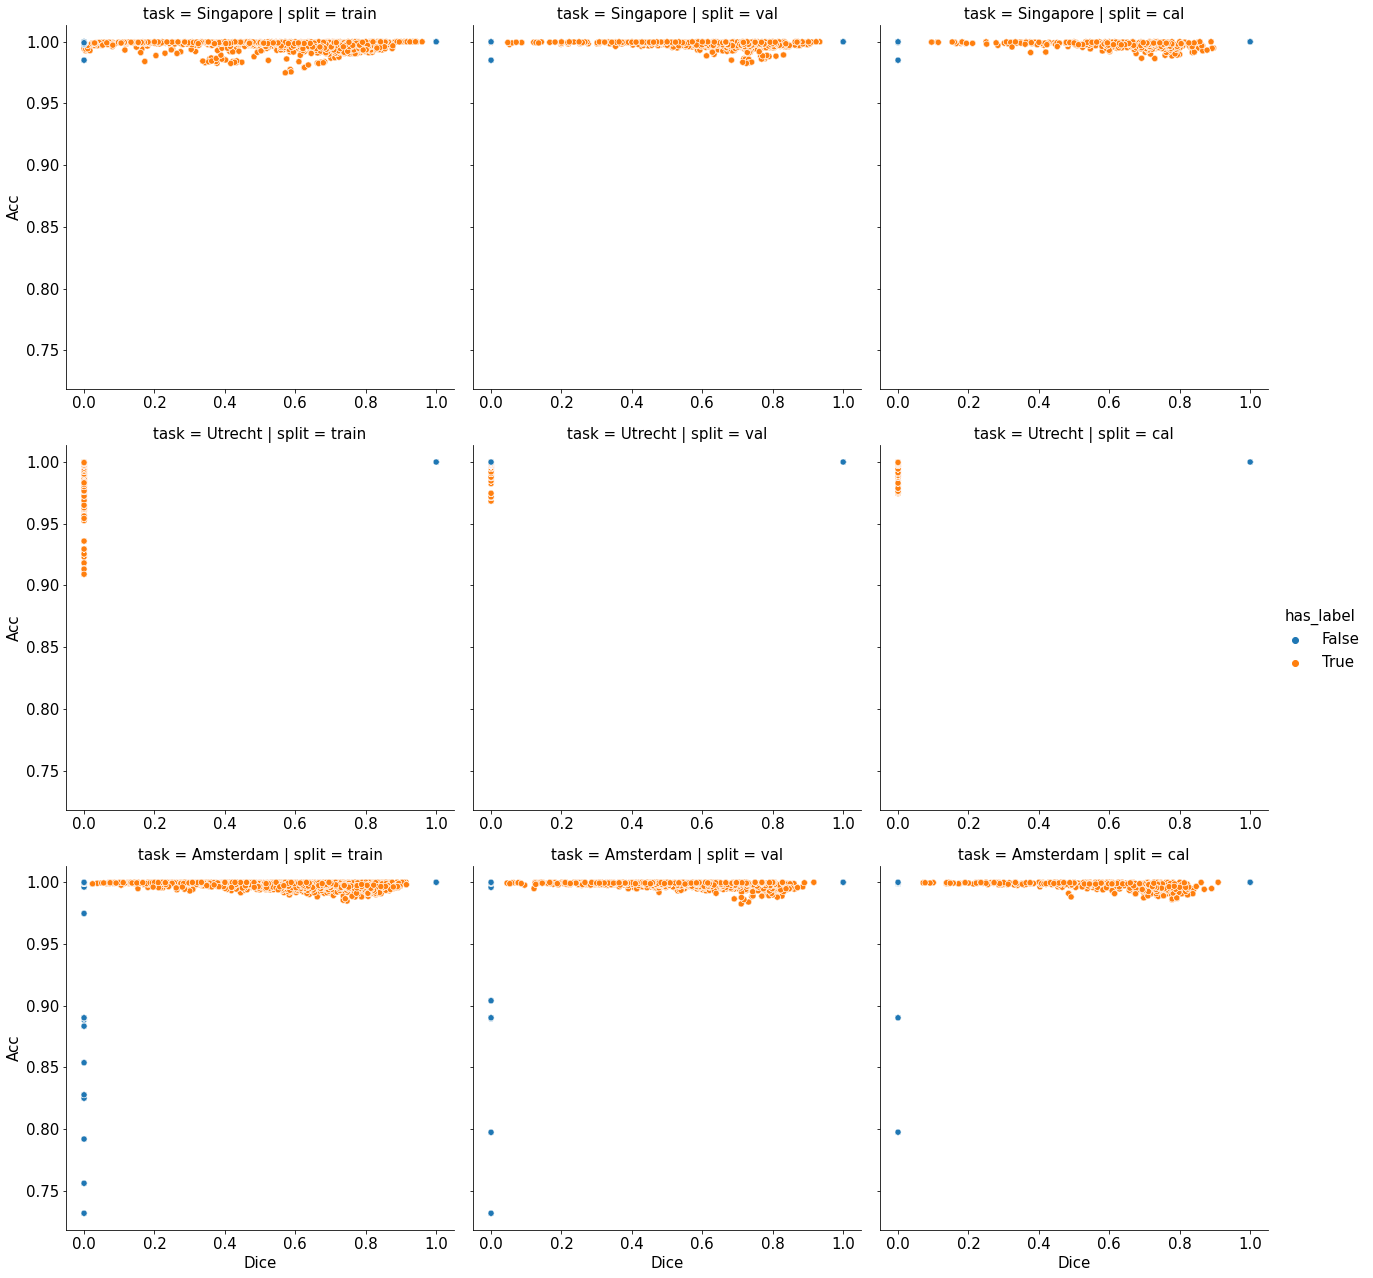

In [8]:
plt.rcParams.update({'font.size': 15})  

g = sns.relplot(
    data=all_logs,
    x='Dice',
    y='Acc',
    row='task',
    col='split',
    kind='scatter',
    hue='has_label',
    height=6,
    facet_kws={"sharex": False}
    )

In [9]:
logs = all_logs[all_logs['has_label'] == True]

# Now for the graph we really care about, let's look at how each metric/weighting correlates first with dice.

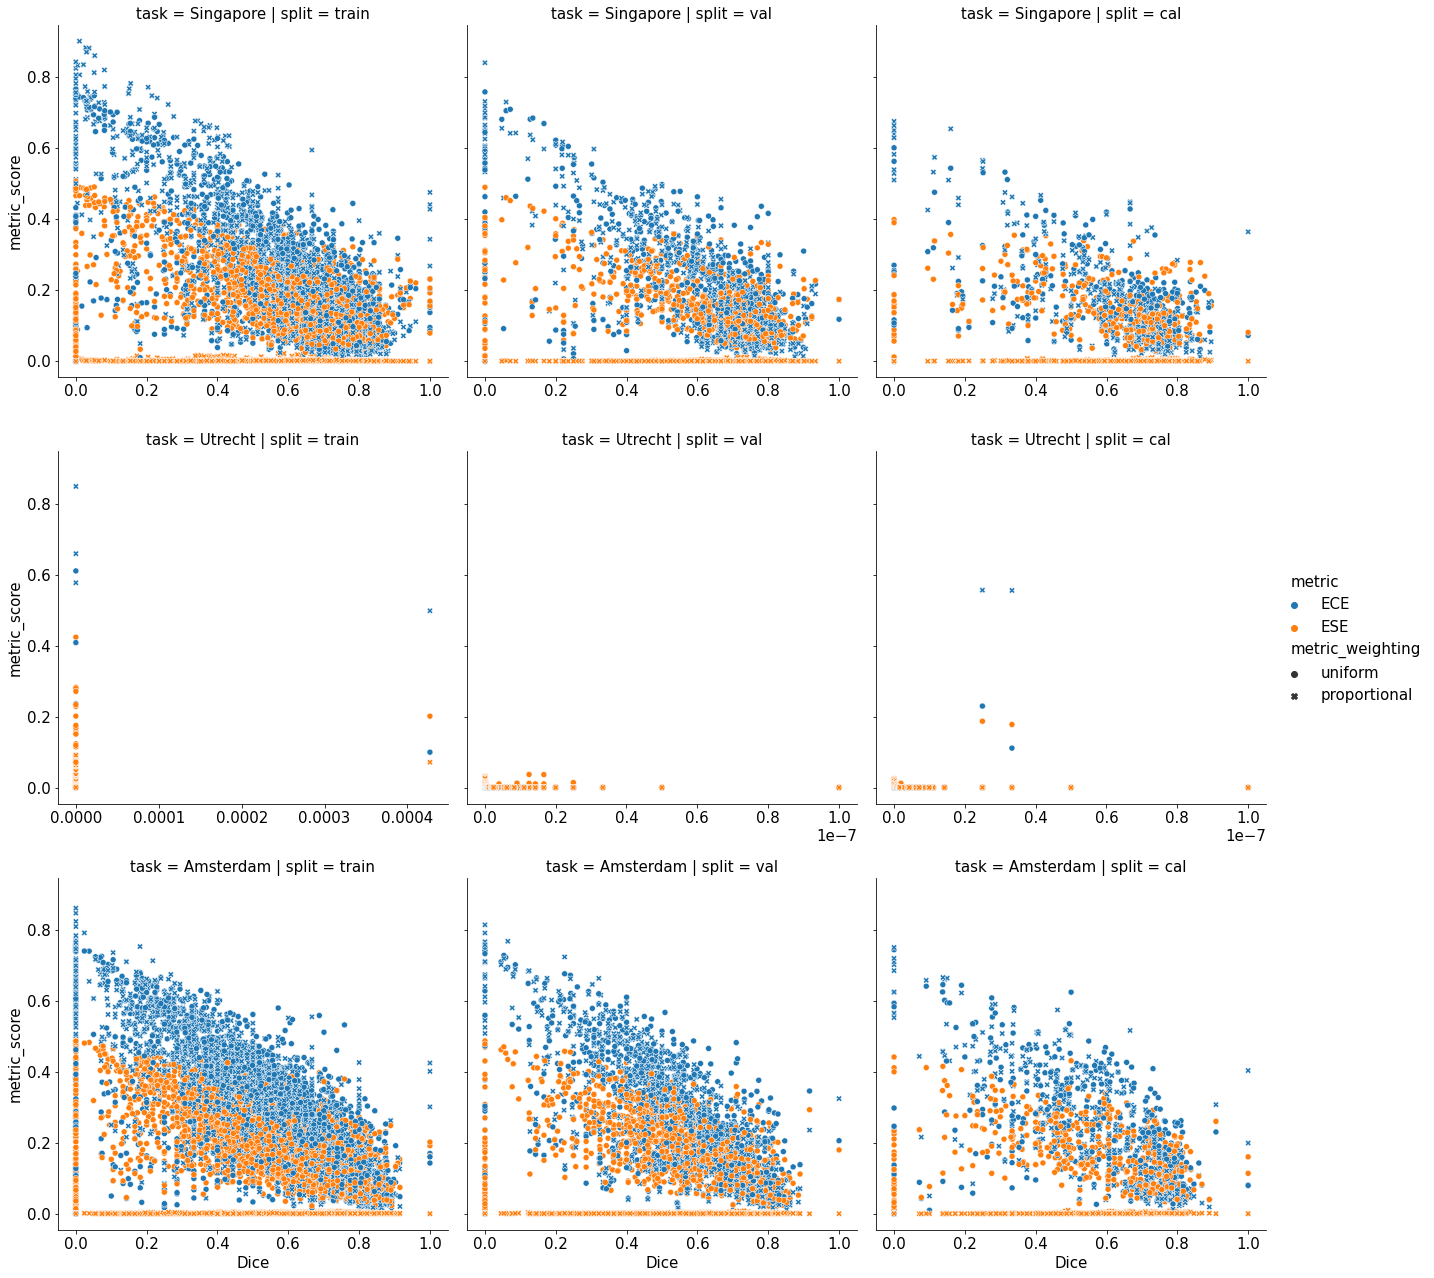

In [10]:
plt.rcParams.update({'font.size': 15})  

g = sns.relplot(
    data=logs,
    x='Dice',
    y='metric_score',
    row='task',
    col='split',
    hue='metric',
    style='metric_weighting',
    kind='scatter',
    height=6,
    facet_kws={"sharex": False}
    )

# Now how well does it correspond with pixel-wise accuracy?

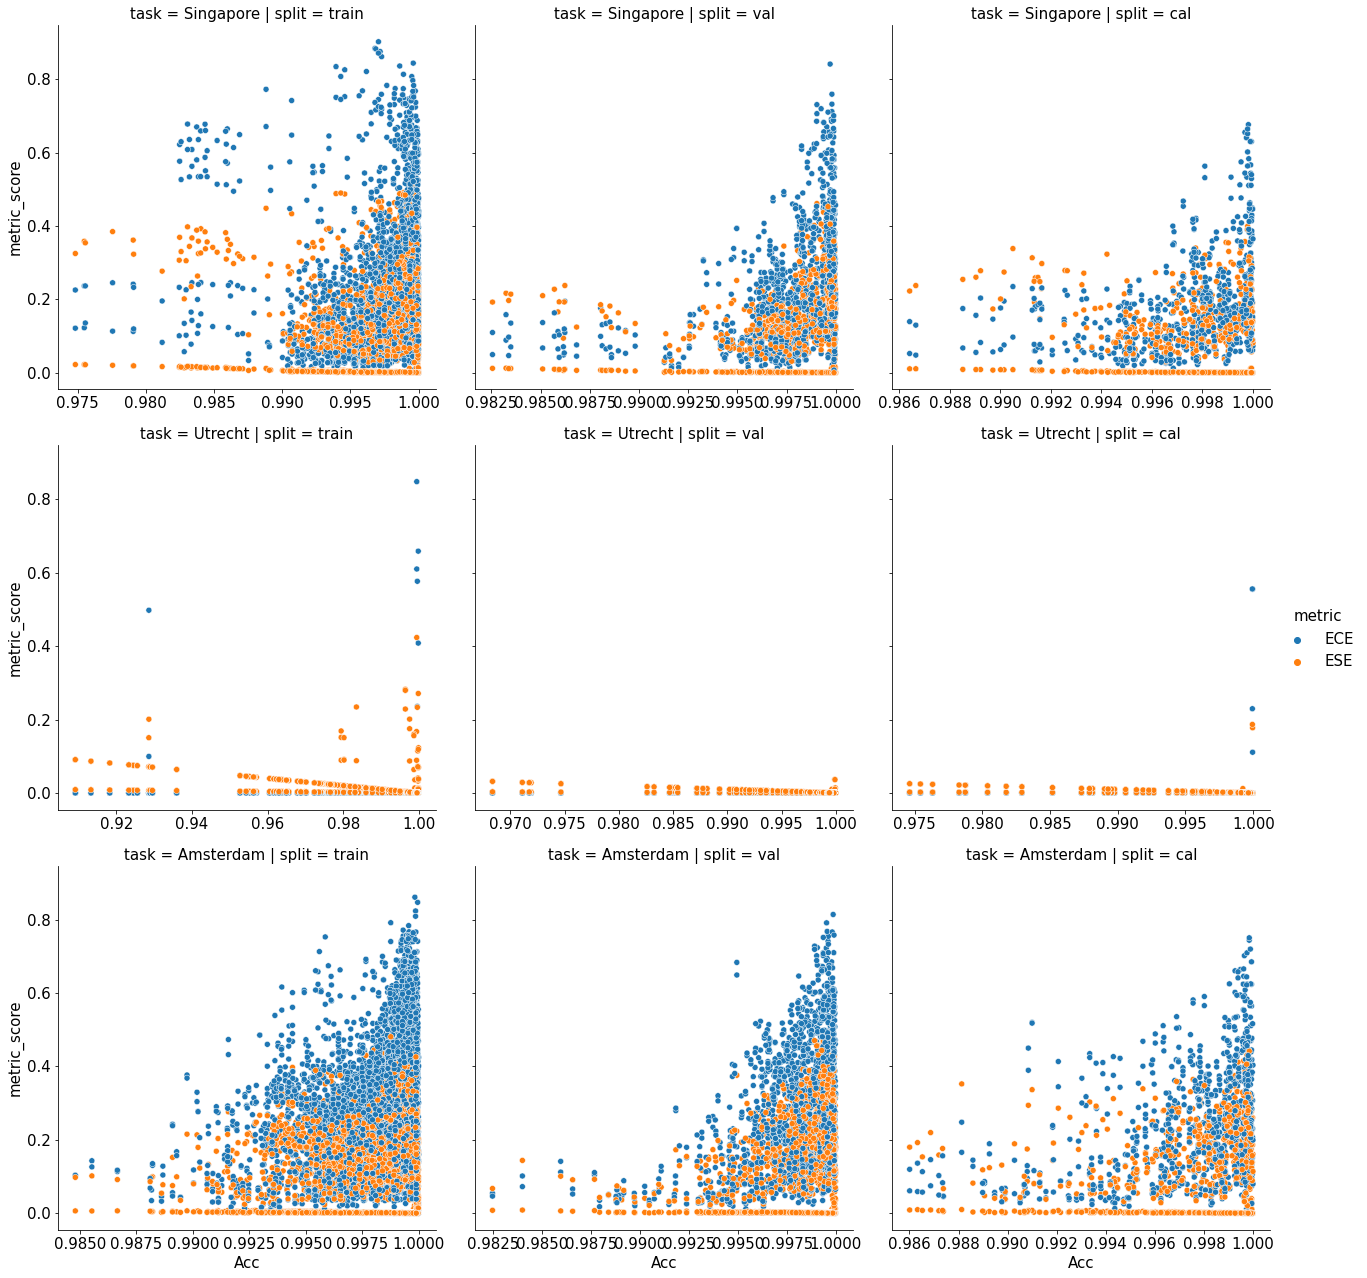

In [11]:
plt.rcParams.update({'font.size': 15})  

g = sns.relplot(
    data=logs,
    x='Acc',
    y='metric_score',
    row='task',
    col='split',
    hue='metric',
    kind='scatter',
    height=6,
    facet_kws={"sharex": False}
    )

# Or how they correlate with the amount of label in the groundtruth segmentation.

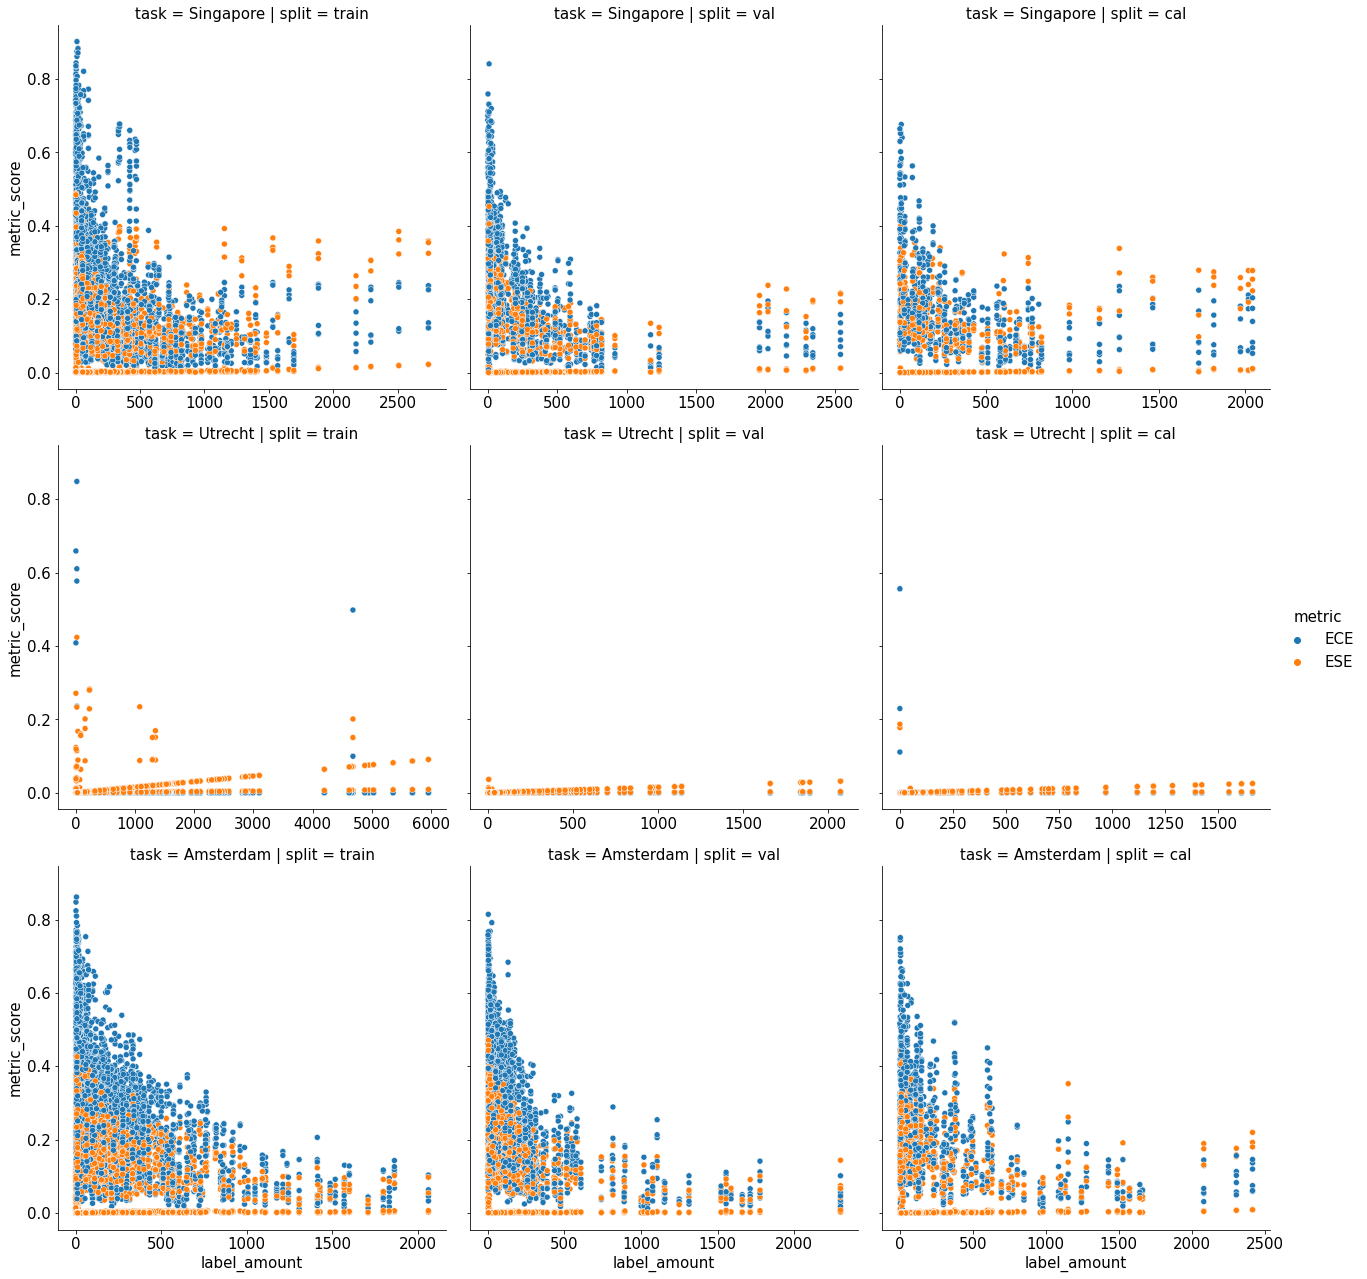

In [12]:
plt.rcParams.update({'font.size': 15})  

g = sns.relplot(
    data=logs,
    x='label_amount',
    y='metric_score',
    row='task',
    col='split',
    hue='metric',
    kind='scatter',
    height=6,
    facet_kws={"sharex": False}
    )